In [24]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import datetime as datetime
from datetime import datetime as dt

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

In [25]:
df_stats = pd.read_csv('../../Dataset/Dataset_clean/stats_UtoD.csv')
df_stats = df_stats.drop (['Unnamed: 0'], axis = 1)
df_stats

,Date,Ticker,Price,DE_Ratio,Trailing_P/E,Price/Sales,Price/Book,Profit_Margin,Operating_Margin,Return_on_Assets,...,Diluted_EPS,Earnings_Growth,Revenue_Growth,Total_Cash,Total_Cash_Per_Share,Total_Debt,Current_Ratio,Book_Value_Per_Share,Cash_Flow,Beta
0,12/7/2003 10:36,AAPL,1.4306,0.072,112.70,1.25,1.84,1.10,0.02,1.06,...,0.185,NaN,7.1,4.570000e+09,12.450,3.040000e+08,2.498,11.520000,NaN,1.742
1,2/3/2004 7:33,AAPL,1.5056,0.070,60.16,1.23,1.92,2.03,1.63,2.08,...,0.371,6.2,8.1,4.790000e+09,12.990,3.020000e+08,2.531,11.740000,NaN,1.749
2,6/3/2004 1:20,AAPL,1.9209,2.921,63.70,1.49,2.33,2.36,2.31,2.54,...,0.454,6.2,8.1,4.590000e+09,12.090,2.921000e+00,2.921,12.042000,3.610000e+08,1.701
3,8/10/2004 2:02,AAPL,2.1320,2.917,54.40,1.51,2.38,2.76,3.00,3.09,...,0.557,6.2,8.1,4.970000e+09,12.800,2.917000e+00,2.917,12.493000,3.610000e+08,1.744
4,10/12/2004 5:40,AAPL,2.5899,2.917,69.28,1.98,3.13,2.76,3.00,3.09,...,0.557,6.2,8.1,4.970000e+09,12.800,2.917000e+00,2.917,12.493000,5.640000e+08,1.802
5,12/4/2004 14:16,AAPL,4.5852,2.632,88.41,3.08,5.03,3.33,3.94,3.86,...,0.709,6.2,8.1,5.460000e+09,13.960,2.632000e+00,2.632,12.968000,5.640000e+08,1.775
6,1/26/2005 15:16,AAPL,4.8869,2.581,57.83,2.99,5.03,5.20,6.71,6.62,...,1.244,300.0,33.4,6.450000e+09,15.940,2.581000e+00,2.581,14.312000,9.340000e+08,1.810
7,2/4/2005 3:07,AAPL,5.3326,2.581,62.55,3.30,5.56,5.20,6.71,6.62,...,1.240,300.0,33.4,6.450000e+09,15.780,2.581000e+00,2.581,14.312000,9.340000e+08,1.810
8,3/1/2005 10:36,AAPL,6.0198,2.581,72.01,1.86,3.11,5.20,6.71,6.63,...,0.620,300.0,33.4,6.450000e+09,7.890,2.581000e+00,2.581,14.312000,1.490000e+09,1.800
9,12/17/2005 11:55,AAPL,9.7413,2.956,45.64,4.37,8.07,9.58,11.84,10.52,...,1.560,305.7,56.5,8.260000e+09,9.802,2.956000e+00,2.956,8.941000,2.540000e+09,NaN


# Problem Definition

### Apply Support Vector Machine to predict Market

# SVM

In [26]:
# To keep only the date without the hours and minutes
df_stats['Date'] = pd.to_datetime(df_stats['Date']) 
df_stats['Date'] = df_stats['Date'].dt.date

In [27]:
# Convert the date to Ordinal
df_stats['Date'] = df_stats['Date'].map(dt.toordinal)
df_stats

,Date,Ticker,Price,DE_Ratio,Trailing_P/E,Price/Sales,Price/Book,Profit_Margin,Operating_Margin,Return_on_Assets,...,Diluted_EPS,Earnings_Growth,Revenue_Growth,Total_Cash,Total_Cash_Per_Share,Total_Debt,Current_Ratio,Book_Value_Per_Share,Cash_Flow,Beta
0,731556,AAPL,1.4306,0.072,112.70,1.25,1.84,1.10,0.02,1.06,...,0.185,NaN,7.1,4.570000e+09,12.450,3.040000e+08,2.498,11.520000,NaN,1.742
1,731614,AAPL,1.5056,0.070,60.16,1.23,1.92,2.03,1.63,2.08,...,0.371,6.2,8.1,4.790000e+09,12.990,3.020000e+08,2.531,11.740000,NaN,1.749
2,731735,AAPL,1.9209,2.921,63.70,1.49,2.33,2.36,2.31,2.54,...,0.454,6.2,8.1,4.590000e+09,12.090,2.921000e+00,2.921,12.042000,3.610000e+08,1.701
3,731803,AAPL,2.1320,2.917,54.40,1.51,2.38,2.76,3.00,3.09,...,0.557,6.2,8.1,4.970000e+09,12.800,2.917000e+00,2.917,12.493000,3.610000e+08,1.744
4,731866,AAPL,2.5899,2.917,69.28,1.98,3.13,2.76,3.00,3.09,...,0.557,6.2,8.1,4.970000e+09,12.800,2.917000e+00,2.917,12.493000,5.640000e+08,1.802
5,731919,AAPL,4.5852,2.632,88.41,3.08,5.03,3.33,3.94,3.86,...,0.709,6.2,8.1,5.460000e+09,13.960,2.632000e+00,2.632,12.968000,5.640000e+08,1.775
6,731972,AAPL,4.8869,2.581,57.83,2.99,5.03,5.20,6.71,6.62,...,1.244,300.0,33.4,6.450000e+09,15.940,2.581000e+00,2.581,14.312000,9.340000e+08,1.810
7,731981,AAPL,5.3326,2.581,62.55,3.30,5.56,5.20,6.71,6.62,...,1.240,300.0,33.4,6.450000e+09,15.780,2.581000e+00,2.581,14.312000,9.340000e+08,1.810
8,732006,AAPL,6.0198,2.581,72.01,1.86,3.11,5.20,6.71,6.63,...,0.620,300.0,33.4,6.450000e+09,7.890,2.581000e+00,2.581,14.312000,1.490000e+09,1.800
9,732297,AAPL,9.7413,2.956,45.64,4.37,8.07,9.58,11.84,10.52,...,1.560,305.7,56.5,8.260000e+09,9.802,2.956000e+00,2.956,8.941000,2.540000e+09,NaN


# Feature Engineering

In [28]:
all_columns = ['Ticker', 'Trailing_P/E', 'Price/Sales', 'Profit_Margin', 'Return_on_Assets', 'Market_Cap', 'Enterprise_Value/Revenue', 'Revenue', 'Gross_Profit', 'Net_Income_Avl_to_Common_', 'Earnings_Growth', 'Total_Cash_Per_Share', 'Total_Cash', 'Total_Debt', 'Cash_Flow']
X_column = ['Date']

# Model Training

In [29]:
# Prediction
date_pred = dt.strptime('2018-06-07', '%Y-%m-%d').date()
date_pred = date_pred.toordinal()
date_pred

736852

In [30]:
df_result = pd.DataFrame(columns = all_columns)
# df_result.loc[0, y_column] = 10
df_result

,Ticker,Trailing_P/E,Price/Sales,Profit_Margin,Return_on_Assets,Market_Cap,Enterprise_Value/Revenue,Revenue,Gross_Profit,Net_Income_Avl_to_Common_,Earnings_Growth,Total_Cash_Per_Share,Total_Cash,Total_Debt,Cash_Flow


In [32]:
# Start the model
# model = LinearRegression(normalize = True)
model = SVR()

# Changing the y_column
for i in range(1,len(all_columns)):
    y_column = all_columns[i]
    # Convert string to list
    y_column = [y_column]
    columns_kept = X_column + ['Ticker'] + y_column
    df_test = df_stats[columns_kept]
    df_test = df_test.dropna()
    df_test = df_test.reset_index(drop=True)
    index = 0
    for stock in df_test['Ticker'].unique():
        # Assign the stock in df_result
        df_result.loc[index, ['Ticker']] = stock

        # Filtering the dataframe
        df_filter = df_test[df_test['Ticker']==stock].copy()

        # Caluclate the required value to split the dataset
        head_split = int(len(df_filter)*0.9)
        tail_split = len(df_filter) - head_split

        # Define the training-testing set   
        X_train = df_filter.head(head_split)[X_column]
        X_test = df_filter.tail(tail_split)[X_column]
        y_train = df_filter.head(head_split)[y_column]
        y_test = df_filter.tail(tail_split)[y_column]
        
        if(y_train.empty):
            continue
            
        # Compute the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        #Prediction
        prediction = model.predict(date_pred)
        df_result.loc[index, y_column] = prediction

        index += 1
    
df_result

C:\Users\Jackson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Ticker,Trailing_P/E,Price/Sales,Profit_Margin,Return_on_Assets,Market_Cap,Enterprise_Value/Revenue,Revenue,Gross_Profit,Net_Income_Avl_to_Common_,Earnings_Growth,Total_Cash_Per_Share,Total_Cash,Total_Debt,Cash_Flow
0,AAPL,18.9553,3.16287,14.6659,11.8645,8.501e+10,2.69054,2.69054,1.115e+10,4.83e+09,36.3339,26.9723,2.449e+10,1.01667,9.6e+09
1,ABC,18.065,0.13,0.72875,4.01182,6.745e+09,0.185,0.185,2.205e+09,4.7794e+08,26.75,6.2634,1.00658e+09,1.285e+09,8.6463e+08
2,ABT,20.6,3.07056,14.312,9.806,8.41e+10,3.38118,3.38118,1.266e+10,3.4e+09,12.3,1.95367,2.42e+09,1.224e+10,5.42e+09
3,ADBE,34.8225,8.3112,22.6109,9.785,1.826e+10,7.49895,7.49895,2.28e+09,5.4459e+08,36.0768,4.21346,2.02e+09,3.5e+08,1.02e+09
4,ADI,23.2567,4.687,20.9578,10.6333,1.2345e+10,3.75818,3.75818,1.52e+09,5.1294e+08,92.0667,6.23438,2.22e+09,6.49557,6.5452e+08
5,ADM,14.7349,0.413577,2.69505,4.44833,2.151e+10,0.539843,0.539843,2.97e+09,1.6e+09,12.05,1.91616,1.31e+09,5.82e+09,7.67105e+08
6,ADSK,32.0465,4.60645,16.5667,15.88,7e+09,4.2764,4.2764,1.35e+09,2.916e+08,36.9045,3.11329,5.3269e+08,1.2755,4.421e+08
7,AEE,15.795,1.42909,9.145,4.02875,1.055e+10,2.38273,2.38273,3.28e+09,5.71e+08,28.95,1.47543,2.78e+08,6.35e+09,1.27e+09
8,AEP,16.84,1.17714,7.7225,3.17833,1.793e+10,2.21556,2.21556,7.95e+09,1.11e+09,42.55,1.58843,6.22e+08,1.415e+10,2.73e+09
9,AFL,16.6567,1.45364,9.17875,2.165,2.0415e+10,1.46154,1.46154,1.328e+10,1.35e+09,11.55,2.71257,1.265e+09,1.425e+09,4.355e+09


In [33]:
df_result = df_result.dropna()
df_result

,Ticker,Trailing_P/E,Price/Sales,Profit_Margin,Return_on_Assets,Market_Cap,Enterprise_Value/Revenue,Revenue,Gross_Profit,Net_Income_Avl_to_Common_,Earnings_Growth,Total_Cash_Per_Share,Total_Cash,Total_Debt,Cash_Flow
0,AAPL,18.9553,3.16287,14.6659,11.8645,8.501e+10,2.69054,2.69054,1.115e+10,4.83e+09,36.3339,26.9723,2.449e+10,1.01667,9.6e+09
1,ABC,18.065,0.13,0.72875,4.01182,6.745e+09,0.185,0.185,2.205e+09,4.7794e+08,26.75,6.2634,1.00658e+09,1.285e+09,8.6463e+08
2,ABT,20.6,3.07056,14.312,9.806,8.41e+10,3.38118,3.38118,1.266e+10,3.4e+09,12.3,1.95367,2.42e+09,1.224e+10,5.42e+09
3,ADBE,34.8225,8.3112,22.6109,9.785,1.826e+10,7.49895,7.49895,2.28e+09,5.4459e+08,36.0768,4.21346,2.02e+09,3.5e+08,1.02e+09
4,ADI,23.2567,4.687,20.9578,10.6333,1.2345e+10,3.75818,3.75818,1.52e+09,5.1294e+08,92.0667,6.23438,2.22e+09,6.49557,6.5452e+08
5,ADM,14.7349,0.413577,2.69505,4.44833,2.151e+10,0.539843,0.539843,2.97e+09,1.6e+09,12.05,1.91616,1.31e+09,5.82e+09,7.67105e+08
6,ADSK,32.0465,4.60645,16.5667,15.88,7e+09,4.2764,4.2764,1.35e+09,2.916e+08,36.9045,3.11329,5.3269e+08,1.2755,4.421e+08
7,AEE,15.795,1.42909,9.145,4.02875,1.055e+10,2.38273,2.38273,3.28e+09,5.71e+08,28.95,1.47543,2.78e+08,6.35e+09,1.27e+09
8,AEP,16.84,1.17714,7.7225,3.17833,1.793e+10,2.21556,2.21556,7.95e+09,1.11e+09,42.55,1.58843,6.22e+08,1.415e+10,2.73e+09
9,AFL,16.6567,1.45364,9.17875,2.165,2.0415e+10,1.46154,1.46154,1.328e+10,1.35e+09,11.55,2.71257,1.265e+09,1.425e+09,4.355e+09


In [34]:
df_result.to_csv('../../Dataset/Dataset_clean/stats_pred.csv')

In [247]:
MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

In [249]:
print ('MAE: ', MAE)
print ('RMSE: ', RMSE)

MAE:  69675878152.35625
RMSE:  84723519160.32912


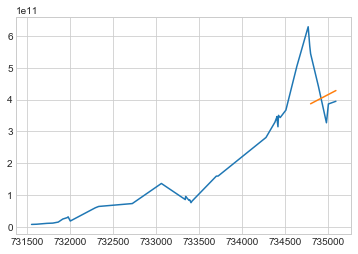

In [254]:

plt.plot(df_test['Date'], df_test['Market_Cap'])
plt.plot(X_test, y_pred)
plt.show()